
# **나의 해방일지**

---

# 12월 07일 <br>
Stage 1. 수업 시간에 배운 MNIST 데이터를 이용해서 손글씨 숫자 판별을 가능케 하는 딥러닝 모델 구축한다. <br>
Stage 2. stage1 에서 배운 MNIST 데이터를 test set에서 성능이 잘 나오는지 테스해본다.<br>

시도: 지금껏 FashionMNIST 데이터셋을 사용하여 accuracy을 높이는 것에 한계가 있었다. 그래서 이번 시도에서는 숫자 데이터가 담겨있는 MNIST 데이터셋으로 같은 모델에 훈련시켜본다.

결과 Accuracy가 99.53 이상이 나왔다.

In [ ]:
import torch
from torch import nn
from torchvision import datasets, transforms 
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%config InlineBackend.figure_format='retina'

In [ ]:
torch.manual_seed(316)

In [ ]:
transform = transforms.Compose(
  [
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
] )

In [ ]:
dataset=datasets.MNIST('.',download=True,train=True,transform=transform)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [ ]:
len_trainset = int(len(dataset) * 0.8)
len_valset = len(dataset) - len_trainset
trainset, valset = torch.utils.data.random_split(dataset, [len_trainset, len_valset])

In [ ]:
batch_size = 64
trainloader = torch.utils.data.DataLoader(
trainset, batch_size=batch_size, shuffle=True
)

In [ ]:
valloader = torch.utils.data.DataLoader(
  valset,
  batch_size=batch_size,
  shuffle=True )

In [ ]:
 idx_to_class = { v:k for k, v in trainset.dataset.class_to_idx.items() } 
 idx_to_class

{0: '0 - zero',
 1: '1 - one',
 2: '2 - two',
 3: '3 - three',
 4: '4 - four',
 5: '5 - five',
 6: '6 - six',
 7: '7 - seven',
 8: '8 - eight',
 9: '9 - nine'}

In [ ]:
images, labels = next(iter(trainloader))
images.shape

torch.Size([64, 1, 28, 28])

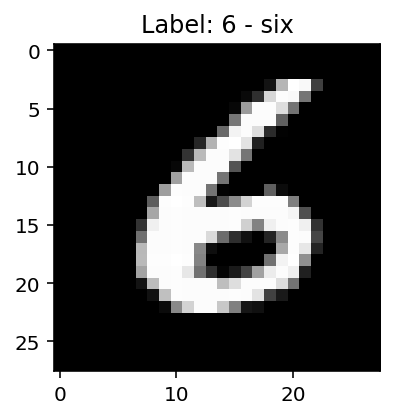

In [ ]:
fig, ax = plt.subplots(figsize=(3,3))
img_idx = 0
label = idx_to_class[int(labels[0])]
ax.imshow(images[0][0], cmap="gray")
ax.set_title(f"Label: {label}")
plt.show()

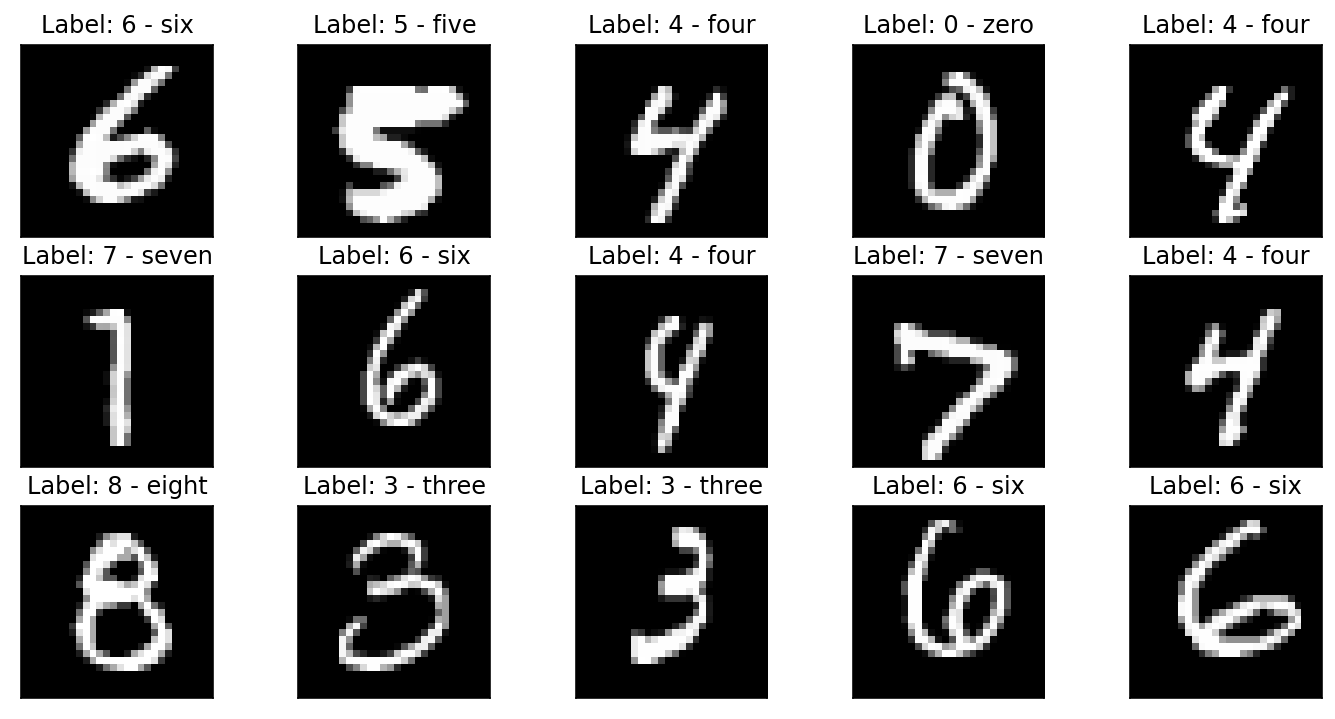

In [ ]:
fig, ax = plt.subplots(ncols=5, nrows=3, figsize=(12,6))
ax = np.ravel(ax)
for index in range(15): 
  ax[index].imshow(images[index][0], cmap="gray")
  label = idx_to_class[int(labels[index])] 
  ax[index].set_title(f"Label: {label}") 
  ax[index].set_xticks([]) 
  ax[index].set_yticks([])
plt.show()

In [ ]:
from collections import OrderedDict 

class Network(nn.Module): 

  def __init__(self):
    super().__init__()
    self.feature_extraction = nn.Sequential(
            nn.Conv2d(1, 512, kernel_size=7,stride = 1, padding=3), 
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=5, stride =1,padding= 1),
            nn.Conv2d(512, 256, kernel_size=3,stride = 1, padding=1), 
            nn.ReLU(),
            nn.Conv2d(256, 128, kernel_size=3,stride = 1, padding=1), 
            nn.Conv2d(128, 64, kernel_size=3,stride = 1, padding=1), 
            nn.ReLU(),
            nn.Conv2d(64, 32, kernel_size=3,stride = 1, padding=1),
            nn.Conv2d(32, 100, kernel_size=3,stride = 1, padding=1),
            nn.Conv2d(100, 200, kernel_size=3,stride = 1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=5,  stride =1)
            )
    self.classifier = nn.Sequential(
            nn.Linear(22*22*200, 2048), 
            nn.BatchNorm1d(2048), 
            nn.Dropout(p=0.5), 
            nn.ReLU(),
            nn.Linear(2048, 10)
            )
    
  def forward(self, x: torch.Tensor) -> torch.Tensor: 
    out1 = self.feature_extraction(x)
    out2 = torch.flatten(out1, 1)
    out3 = self.classifier(out2)
    return out3 

model = Network()

In [ ]:
from torchsummary import summary 
summary(model, (1, 28, 28), device="cpu")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 512, 28, 28]          25,600
              ReLU-2          [-1, 512, 28, 28]               0
         MaxPool2d-3          [-1, 512, 26, 26]               0
            Conv2d-4          [-1, 256, 26, 26]       1,179,904
              ReLU-5          [-1, 256, 26, 26]               0
            Conv2d-6          [-1, 128, 26, 26]         295,040
            Conv2d-7           [-1, 64, 26, 26]          73,792
              ReLU-8           [-1, 64, 26, 26]               0
            Conv2d-9           [-1, 32, 26, 26]          18,464
           Conv2d-10          [-1, 100, 26, 26]          28,900
           Conv2d-11          [-1, 200, 26, 26]         180,200
             ReLU-12          [-1, 200, 26, 26]               0
        MaxPool2d-13          [-1, 200, 22, 22]               0
           Linear-14                 [-

In [ ]:
total_params = 0
for name, param in model.named_parameters():
    print(name, param.shape, param.numel())
    total_params += param.numel()
print(f"Total number of parameters = {total_params}")

feature_extraction.0.weight torch.Size([512, 1, 7, 7]) 25088
feature_extraction.0.bias torch.Size([512]) 512
feature_extraction.3.weight torch.Size([256, 512, 3, 3]) 1179648
feature_extraction.3.bias torch.Size([256]) 256
feature_extraction.5.weight torch.Size([128, 256, 3, 3]) 294912
feature_extraction.5.bias torch.Size([128]) 128
feature_extraction.6.weight torch.Size([64, 128, 3, 3]) 73728
feature_extraction.6.bias torch.Size([64]) 64
feature_extraction.8.weight torch.Size([32, 64, 3, 3]) 18432
feature_extraction.8.bias torch.Size([32]) 32
feature_extraction.9.weight torch.Size([100, 32, 3, 3]) 28800
feature_extraction.9.bias torch.Size([100]) 100
feature_extraction.10.weight torch.Size([200, 100, 3, 3]) 180000
feature_extraction.10.bias torch.Size([200]) 200
classifier.0.weight torch.Size([2048, 96800]) 198246400
classifier.0.bias torch.Size([2048]) 2048
classifier.1.weight torch.Size([2048]) 2048
classifier.1.bias torch.Size([2048]) 2048
classifier.4.weight torch.Size([10, 2048]) 

In [ ]:
import time

from torch import optim
# set up an optimizer (pass parameters to be optimized and a learning rate)
optimizer = optim.Adam(model.parameters(), lr=0.0001)
# define the loss
criterion = nn.CrossEntropyLoss()

In [ ]:
 import torch
 
 device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") 
 device

 model.to(device)

Network(
  (feature_extraction): Sequential(
    (0): Conv2d(1, 512, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=5, stride=1, padding=1, dilation=1, ceil_mode=False)
    (3): Conv2d(512, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): Conv2d(256, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): Conv2d(32, 100, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): Conv2d(100, 200, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): MaxPool2d(kernel_size=5, stride=1, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Linear(in_features=96800, out_features=2048, bias=True)
    (1): BatchNorm1d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

In [ ]:
start_time = time.time()
n_epochs = 30
train_loss_history = []
val_loss_history = []
accuracy_history = []
for epoch in range(n_epochs): 
  train_loss = 0
  model.train()
  for images, labels in trainloader:
    images, labels = images.to(device), labels.to(device) # zero the gradients on each training pass
    optimizer.zero_grad()
    # make a forward pass through the network
    logits = model.forward(images)
    # use the network output to calculate the loss (output vs. ground truth)
    loss = criterion(logits, labels)
        # make a backward pass through the network to calculate the gradients (backpropagation)
    loss.backward()
    # update the weights
    optimizer.step()
    # keep track of the loss per epoch
    train_loss += loss.item() 
  else:
    train_loss = train_loss / len(trainloader)
    train_loss_history.append(train_loss)
    val_loss = 0
    accuracy = 0
    with torch.no_grad(): 
      model.eval()
      for images, labels in valloader:
        images, labels = images.to(device), labels.to(device) 
        logits = model.forward(images)
        loss = criterion(logits, labels)
        val_loss += loss.item()
        probabilities = logits.softmax(dim=1)
        top_probs, top_classes = probabilities.topk(k=1, dim=1)
        corrects = (top_classes == labels.view(*top_classes.shape))          
        accuracy += torch.mean(corrects.type(torch.FloatTensor))
    val_loss = val_loss / len(valloader)
    val_loss_history.append(val_loss)
    accuracy = accuracy / len(valloader)
    accuracy_history.append(accuracy)
    metrics = f"Epoch: {epoch + 1:02}/{n_epochs:02}" 
    metrics += " | "
    metrics += f"Train loss: {train_loss:.3f}" 
    metrics += " | "
    metrics += f"Validation loss: {val_loss:.3f}" 
    metrics += " | "
    metrics += f"Accuracy: {accuracy:.3f}" 
    print(metrics)
print("Elapsed: {0:.2f} seconds".format(time.time() - start_time))

Epoch: 01/30 | Train loss: 0.083 | Validation loss: 0.071 | Accuracy: 0.978
Epoch: 02/30 | Train loss: 0.041 | Validation loss: 0.042 | Accuracy: 0.988
Epoch: 03/30 | Train loss: 0.032 | Validation loss: 0.043 | Accuracy: 0.987
Epoch: 04/30 | Train loss: 0.026 | Validation loss: 0.028 | Accuracy: 0.992
Epoch: 05/30 | Train loss: 0.023 | Validation loss: 0.044 | Accuracy: 0.988
Epoch: 06/30 | Train loss: 0.021 | Validation loss: 0.026 | Accuracy: 0.993
Epoch: 07/30 | Train loss: 0.018 | Validation loss: 0.036 | Accuracy: 0.989
Epoch: 08/30 | Train loss: 0.016 | Validation loss: 0.023 | Accuracy: 0.994
Epoch: 09/30 | Train loss: 0.013 | Validation loss: 0.027 | Accuracy: 0.993
Epoch: 10/30 | Train loss: 0.014 | Validation loss: 0.026 | Accuracy: 0.993
Epoch: 11/30 | Train loss: 0.011 | Validation loss: 0.024 | Accuracy: 0.993
Epoch: 12/30 | Train loss: 0.009 | Validation loss: 0.021 | Accuracy: 0.994
Epoch: 13/30 | Train loss: 0.009 | Validation loss: 0.027 | Accuracy: 0.993
Epoch: 14/30

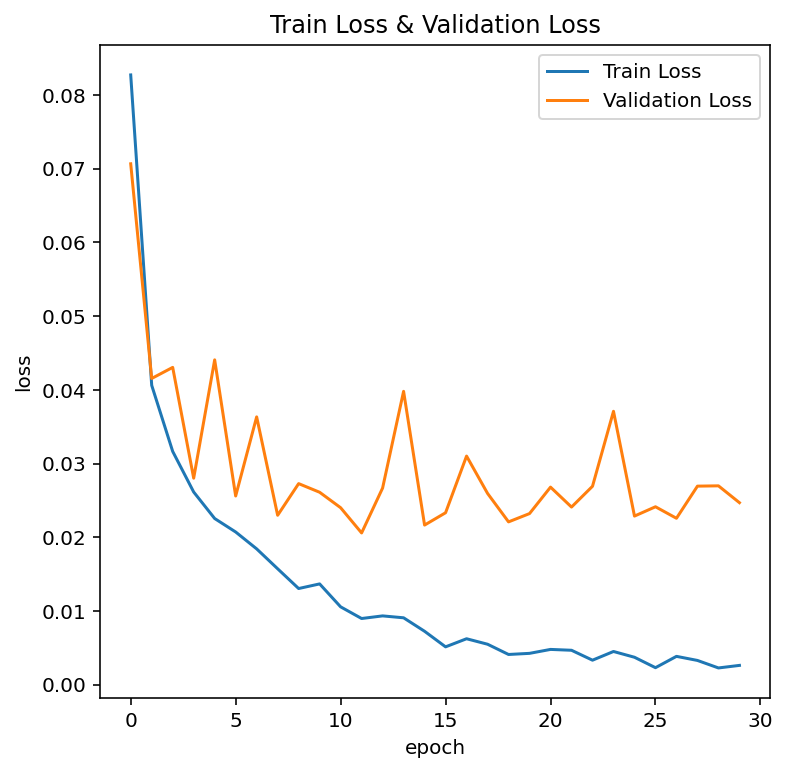

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(train_loss_history, label="Train Loss")
ax.plot(val_loss_history, label="Validation Loss")
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("Train Loss & Validation Loss")
ax.legend()
plt.show()

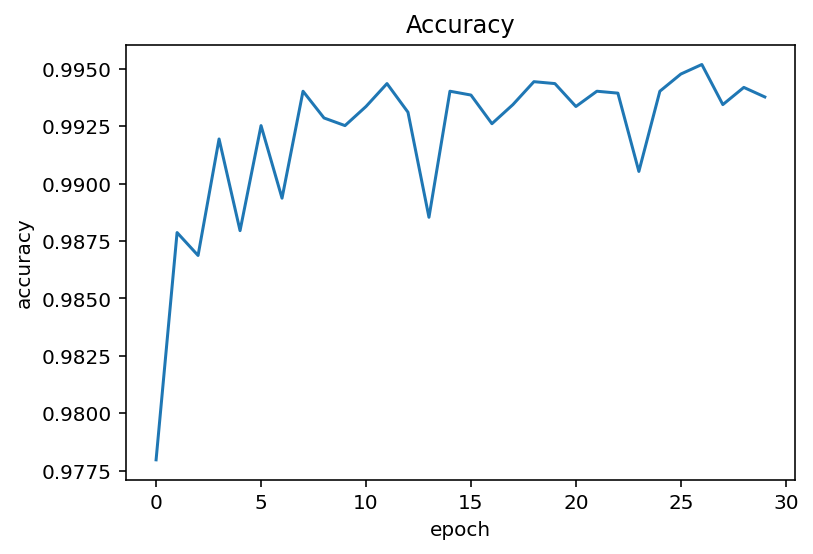

In [ ]:
fig, ax = plt.subplots()
ax.plot(accuracy_history, label="Accuracy")
ax.set_xlabel("epoch")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy")
plt.show()

In [ ]:
# download the testset
testset = datasets.MNIST('.', download=True, train=False, transform=transform)
# loader for the testset
testloader = torch.utils.data.DataLoader( testset,
batch_size=batch_size,
shuffle=True
)

In [ ]:
total = 0 
total_corrects = 0 
with torch.no_grad():
  for images, labels in testloader:
    images, labels = images.to(device), labels.to(device) 
    logits = model.forward(images)
    probabilities = logits.softmax(dim=1)
    top_probs, top_classes = probabilities.topk(k=1, dim=1)
    corrects = (top_classes == labels.view(*top_classes.shape))
    corrects = int(torch.sum(corrects).cpu().numpy())
    total_corrects += corrects
    total += labels.size(0)

In [ ]:
total_corrects / total * 100.0

99.53